#                                       <center>UBER Cab Price Prediction 
# ---------------------------------------------------------------------------------------------------------------



In [2]:
#displaying image
from IPython.display import Image
Image(url= "Uber_image.jpeg")

#### The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

##  Collecting the data
___________________________________

In [3]:
#Importing the basic librarires
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4]:
#Displaying uber car price prediction dataset which is named as rides(csv file)
uber_dataset = pd.read_csv("rides.csv")

##  Exploratory data analysis
__________________________________________________

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it.

EDA is all about making sense of data in hand.


In [5]:
#Displaying top 5 rows of the dataset
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
#Shape of the dataset
uber_dataset.shape

(693071, 57)

In [7]:
#Information of the dataset like column name,datatype,null values are displayed
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
#statistical values are displayed
uber_dataset.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [9]:
#checking for null values
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

##  Feature Engineering
-----------------------------------------------------

What is a feature and why we need the engineering of it? Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. 

I think feature engineering efforts mainly have two goals:

1) Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

2) Improving the performance of machine learning models.

**According to a survey in Forbes, data scientists spend 80% of their time on data preparation:**

### Ploting

In [10]:
#importing libraries which are used in plots
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

##### Heat map

In [11]:
#For lyft: Surge Multiplier and Distance are weakly correlated For lyft: Surge Multiplier and Price are more correlated than For Uber: Price and Distance are weakly correlated

<AxesSubplot:>

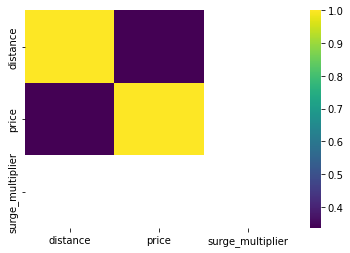

In [12]:
lyft_df = uber_dataset[uber_dataset["cab_type"] == "Lyft"]
uber_ds = uber_dataset[uber_dataset['cab_type'] == "Uber"]
uber_ds_corr = uber_ds[["distance", "price", "surge_multiplier"]]
lyft_df_corr = lyft_df[["distance", "price", "surge_multiplier"]]
sns.heatmap(uber_ds_corr.corr(), cmap="viridis")

<AxesSubplot:>

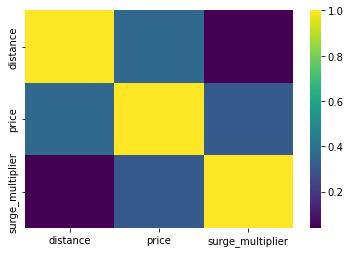

In [13]:
sns.heatmap(lyft_df_corr.corr() , cmap="viridis")

#### Scatter Plots

In [14]:
#Distance and price are not strongly correlated. As the distance increases, price does not increase linearly.

Text(0.5, 1.0, 'Uber - Distance Vs Price')

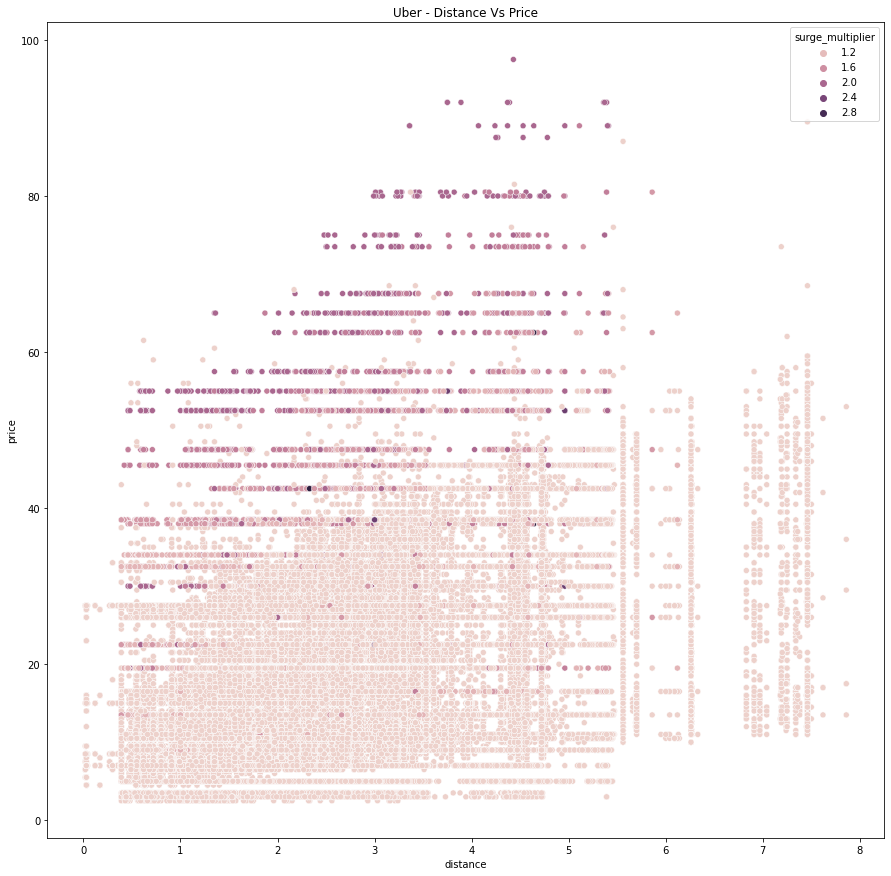

In [15]:
uber_dis_price_surge = uber_dataset[['distance', 'surge_multiplier', 'price']]
plt.figure(figsize=(15, 15))
sns.scatterplot(data=uber_dis_price_surge, x="distance", y="price", hue="surge_multiplier").set_title("Uber - Distance Vs Price")

Text(0.5, 1.0, 'Lyft - Distance Vs Price')

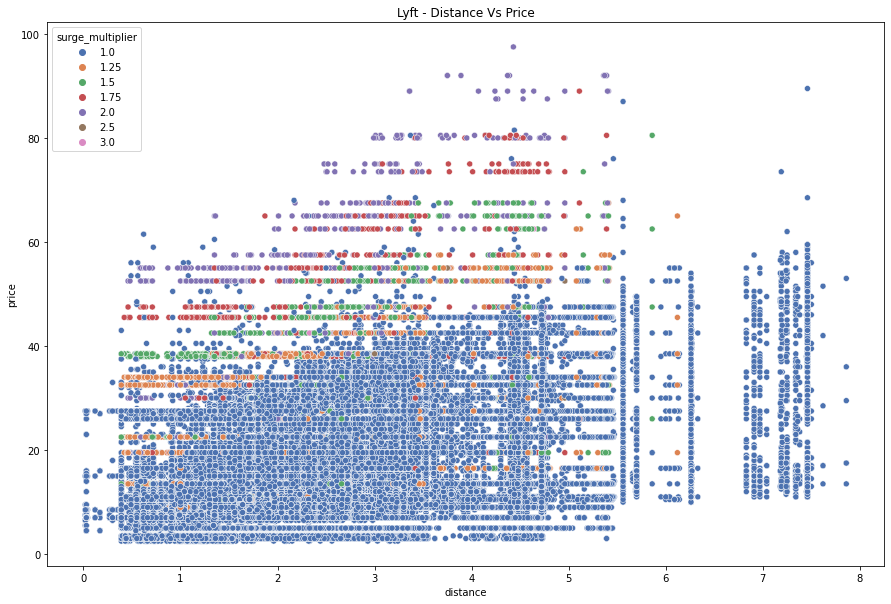

In [16]:
## we get to know that distance and price are weakly correlated in case of Uber
plt.figure(figsize=(15, 10))
sns.scatterplot(data=uber_dis_price_surge, x="distance", y="price", hue="surge_multiplier", palette="deep").set_title("Lyft - Distance Vs Price")

#### Strip Plots

<AxesSubplot:xlabel='price', ylabel='name'>

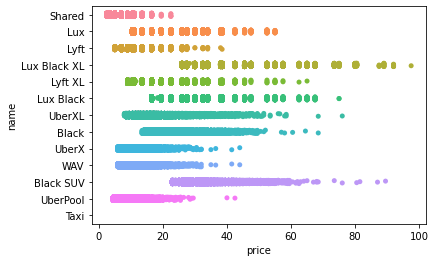

In [17]:
#comparing all the types of cars on the basis of price
sns.stripplot(data=uber_dataset, x='price', y='name')

<AxesSubplot:xlabel='price', ylabel='icon'>

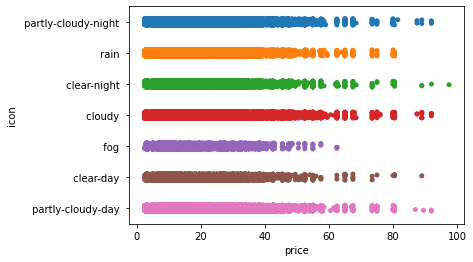

In [18]:
#comparing number of rides based on weather v/s price
sns.stripplot(data=uber_dataset, x='price', y='icon')

<AxesSubplot:xlabel='surge_multiplier', ylabel='source'>

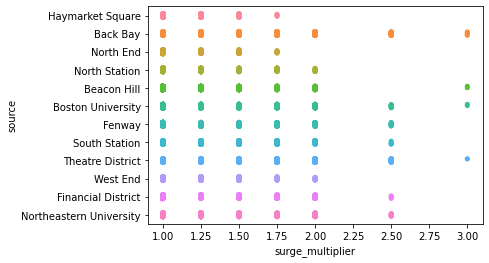

In [19]:
#source v/s surge_multiplier
sns.stripplot(data=uber_dataset, x='surge_multiplier', y='source')

<AxesSubplot:xlabel='surge_multiplier', ylabel='hour'>

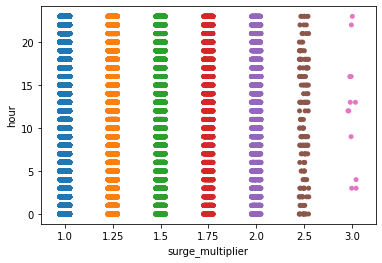

In [20]:
#hour v/s surge_multiplier
sns.stripplot(data=uber_dataset, x='surge_multiplier', y='hour')

#### Converting Timestamp to Datetime value

In [21]:
#Displaying only time column from the dataset
uber_dataset['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [22]:
#converting timestamp column into readble format
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 15:00:08
dt_object = 2018-11-27 07:30:24
dt_object = 2018-12-03 11:58:03
dt_object = 2018-11-30 21:43:04
dt_object = 2018-12-14 00:45:04


- So by this timestamp to datetime conversion we get to know that, our data is of the year 2018 and in the month of november and december only

#### Bar plots

<AxesSubplot:>

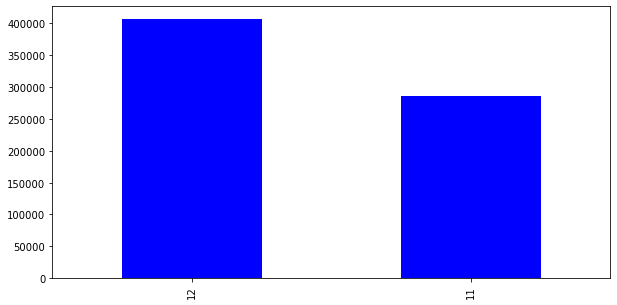

In [23]:
#Here we are comparing only nov and dec month for the rides
uber_dataset['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

<AxesSubplot:>

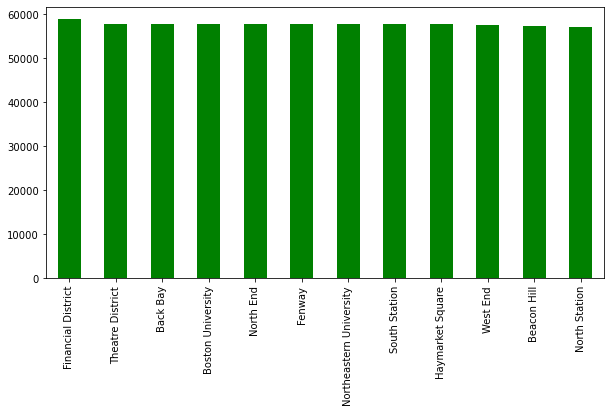

In [24]:
#finding the source place of the customer who book their ride
uber_dataset['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

<AxesSubplot:>

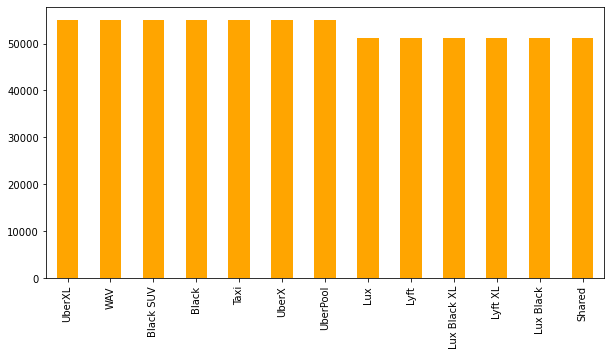

In [25]:
#commonly opted cab
uber_dataset['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

<AxesSubplot:>

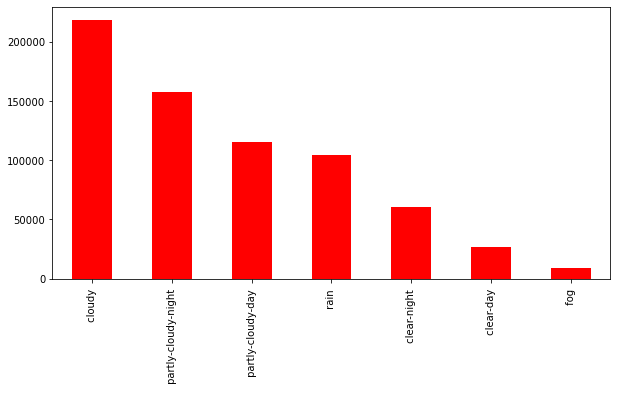

In [26]:
#Likable of taking the cab in different weather
uber_dataset['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

<AxesSubplot:>

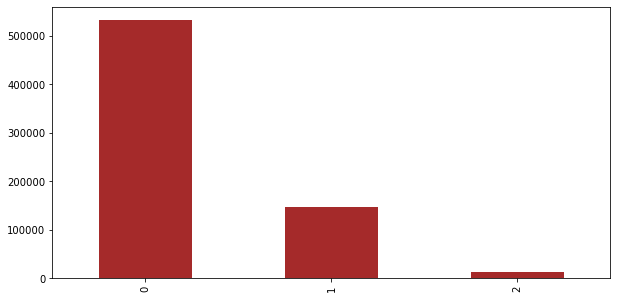

In [27]:
#Analyzing UV index
uber_dataset['uvIndex'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')

<AxesSubplot:>

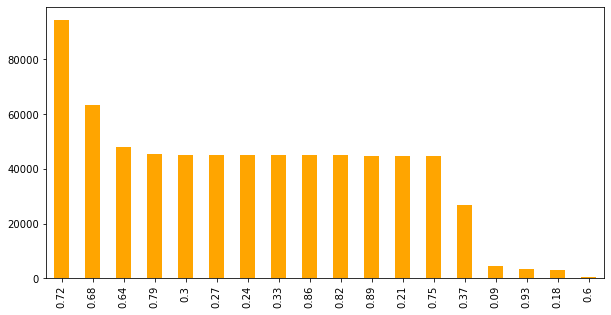

In [28]:
#understanding the rides in different days
uber_dataset['moonPhase'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

<AxesSubplot:>

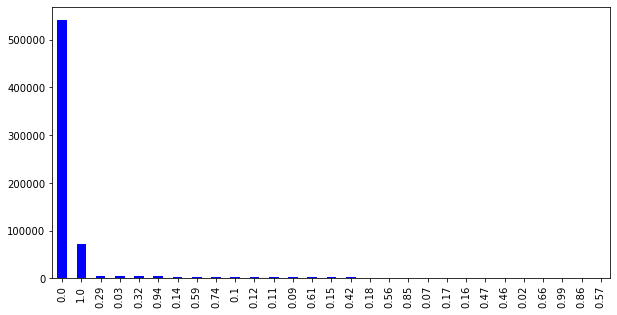

In [29]:
#graph of precipProbability column
uber_dataset['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

In [30]:
#Surge and Day of Week

In [31]:
uber_dataset["surge_multiplier"].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [32]:
#considering surge_multiplier which is greater than 1
high_surge_dataset = uber_dataset[uber_dataset["surge_multiplier"]> 1]

Text(0.5, 1.0, 'month wise Surge')

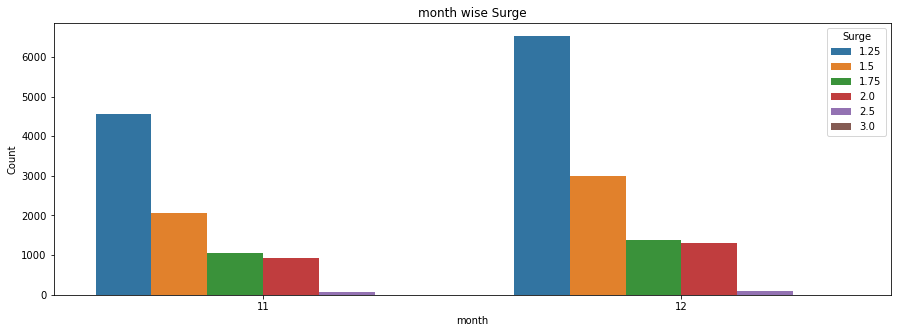

In [33]:
#plotting surge_multiplier with respect to november and december
t_high_surge = pd.DataFrame(high_surge_dataset.groupby(["month", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["month", "Surge", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(x="month", y="Count", hue="Surge", data=t_high_surge).set_title("month wise Surge")

#### Box Plot

<AxesSubplot:xlabel='surge_multiplier', ylabel='distance'>

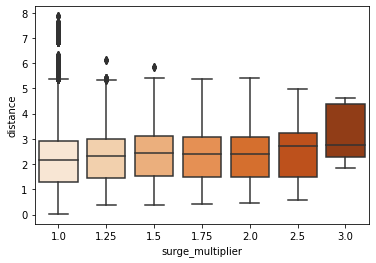

In [34]:
#A plot of distance v/s surge_multiplier
sns.boxplot(data=uber_dataset,y="distance",x="surge_multiplier",orient="v", palette="Oranges")

#### Removal of outliers

In [35]:
#here we are removing outlier w.r.t distance 
percentile25 = uber_dataset['distance'].quantile(0.25)
percentile75 = uber_dataset['distance'].quantile(0.75)

In [36]:
#we are using IQR method 
iqr=percentile75-percentile25

In [37]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [38]:
print(upper_limit)
print(lower_limit)

5.38
-1.18


In [39]:
#as we can see in the below dataset their is no outlier
uber_dataset[uber_dataset['distance'] > upper_limit]
uber_dataset[uber_dataset['distance'] < lower_limit]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


In [40]:
#shape of the dataset w.r.t distance which is less than upper_limit
new_df = uber_dataset[uber_dataset['distance'] < upper_limit]
new_df.shape

(684265, 57)

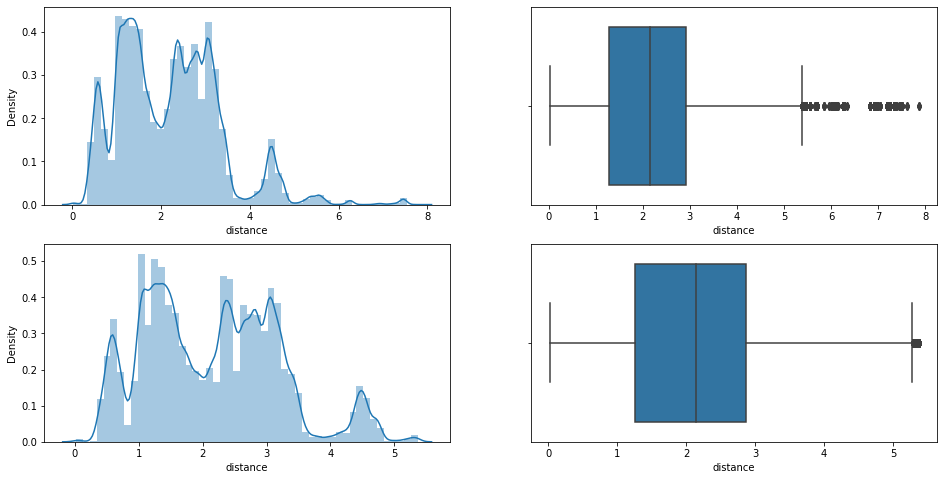

In [41]:
#here we are plotting the distance without alteration and distance which is less than upper_limit
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(uber_dataset['distance'])
plt.subplot(2,2,2)
sns.boxplot(uber_dataset['distance'])
plt.subplot(2,2,3)
sns.distplot(new_df['distance'])
plt.subplot(2,2,4)
sns.boxplot(new_df['distance'])
plt.show()

### Feature Selection/Extraction

                                       Correlation Matrix                                       


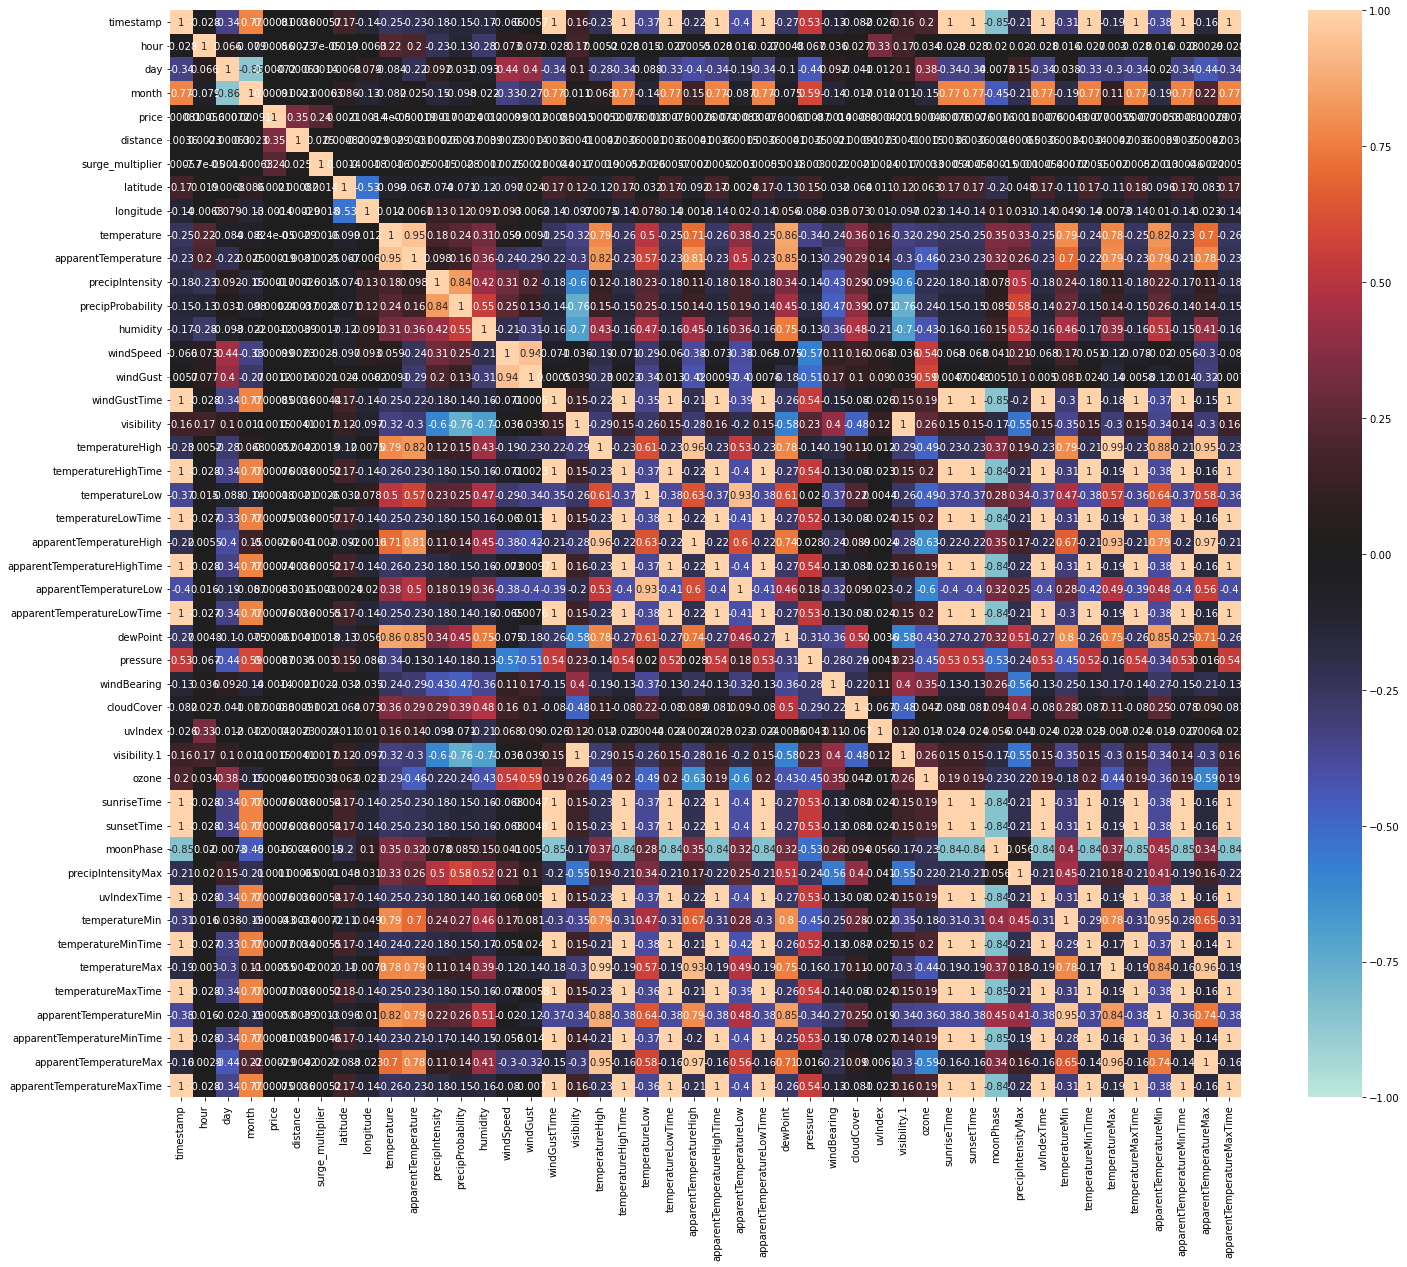

In [42]:
#Checking the correlation
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[24,20])
sns.heatmap(uber_dataset.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

### Label Encoding

In [43]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [44]:
#converting float datype of cab_type column to int
uber_dataset['cab_type']= label_encoder.fit_transform(uber_dataset['cab_type'])
print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [45]:
#checking the datatypes of each column after changing the type of cab_type column
uber_dataset.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                         int32
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [46]:
#label_encoder is used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
#fit_transform is used to Fit label encoder and return encoded labels.
uber_dataset['id']= label_encoder.fit_transform(uber_dataset['id']) 
uber_dataset['datetime']= label_encoder.fit_transform(uber_dataset['datetime']) 
uber_dataset['timezone']= label_encoder.fit_transform(uber_dataset['timezone'])
uber_dataset['destination']= label_encoder.fit_transform(uber_dataset['destination']) 
uber_dataset['product_id']= label_encoder.fit_transform(uber_dataset['product_id'])
uber_dataset['short_summary']= label_encoder.fit_transform(uber_dataset['short_summary'])
uber_dataset['long_summary']= label_encoder.fit_transform(uber_dataset['long_summary'])

In [47]:
#All the cab types are assigned a numerical value for using it in ML models
uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [48]:
#all the source places are assigned numerical value for using it in ML models
uber_dataset['source']= label_encoder.fit_transform(uber_dataset['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [49]:
##all the weather types are assigned numerical value for using it in ML models
uber_dataset['icon']= label_encoder.fit_transform(uber_dataset['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [50]:
#after converting the datatypes of above columns we are checking the datatypes each column
uber_dataset.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
cab_type                         int32
product_id                       int32
name                             int32
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int32
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [51]:
#displaying 5 rows to ensure the numerical values assigned to above mentioned columns
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Filling NAN Values

In [52]:
#checking for null values
#we can see price column contains null values
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [53]:
#getting the median of the price column
uber_dataset['price'].median()

13.5

In [54]:
#replacing the null values with the median
uber_dataset["price"].fillna(10.5, inplace = True) 

In [55]:
#after replacing null values with median of price column again checking for any null values
uber_dataset.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [56]:
#datatype of price column
uber_dataset['price'].dtype

dtype('float64')

In [57]:
#chainging datatype of price column to int
uber_dataset['price'] = uber_dataset['price'].astype(int)

In [58]:
#to ensure the change of datatype head() is used
uber_dataset['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

### RFE (Recursive Feature Elimination)

In [59]:
#importing libraries which are used in RFE
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [60]:
#splitting the dataset 
#X which contains all the columns other than price
#y which contains only price column
X = uber_dataset.drop('price', axis = 1)
y = uber_dataset['price']

In [61]:
#printing X dataset
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [62]:
#printing y dataset
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [63]:
#shape of X
X.shape

(693071, 56)

In [64]:
#shape of y
y.shape

(693071,)

<AxesSubplot:>

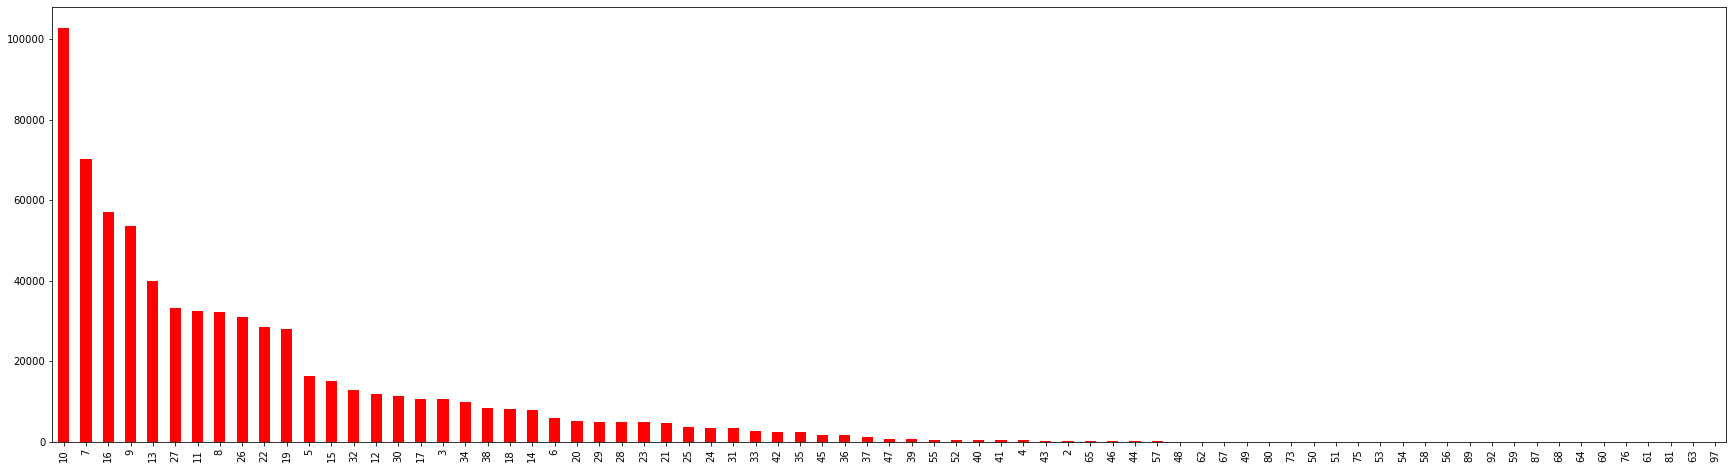

In [65]:
#a plot y dataset i.e., price column
y.value_counts().plot(kind='bar',figsize=(30,8),color='red')

#### Training accuracy in 56 features

In [66]:
#splitting the datasets X & y for training and testing in the ratio 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
#shape of X_train
X_train.shape

(554456, 56)

In [68]:
#shape of X_test
X_test.shape

(138615, 56)

In [69]:
#shape of y_train
y_train.shape

(554456,)

In [70]:
#shape of y_test
y_test.shape

(138615,)

In [71]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

In [72]:
#checking the accuracy of the model for 56 features
reg.score(X_train, y_train)

0.5210613019979048

#### Training accuracy in 40 features

In [73]:
#RFE for 40 features
rfe = RFE(reg, 40, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.


In [74]:
#The mask of selected features.
rfe.support_

array([False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [75]:
#getting the data of only the selected columns
XX = X[X.columns[rfe.support_]]

In [76]:
#head of XX
XX.head()

,hour,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,...,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5,7,0,8,7,0.44,1.0,...,10.000,303.8,1544962084,1544994864,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,5,7,0,12,2,0.44,1.0,...,4.786,291.1,1543232969,1543266992,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,5,7,0,7,5,0.44,1.0,...,10.000,315.7,1543319437,1543353364,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,5,7,0,10,4,0.44,1.0,...,10.000,291.1,1543492370,1543526114,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,5,7,0,11,6,0.44,1.0,...,10.000,347.7,1543405904,1543439738,0.72,0.0001,33.10,42.18,29.11,35.75


In [77]:
#splitting the datasets X & y for training and testing in the ratio 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [78]:
#shape of X_train
X_train.shape

(485149, 40)

In [79]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [80]:
#checking the accuracy of the model for 40 features
reg1.score(X_train, y_train)

0.5208213396761855

#### Training accuracy in 15 features

In [81]:
#RFE for 15 features
rfe = RFE(reg, 15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [82]:
#getting the data of only the selected columns
XX = X[X.columns[rfe.support_]]

In [83]:
#head of XX
XX.head()

,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,dewPoint,temperatureMax,apparentTemperatureMax
0,5,0,8,7,0.44,1.0,42.2148,-71.033,0.0000,0.68,43.68,37.95,32.70,43.68,38.07
1,5,0,12,2,0.44,1.0,42.2148,-71.033,0.1299,0.94,47.30,43.92,41.83,47.30,43.92
2,5,0,7,5,0.44,1.0,42.2148,-71.033,0.0000,0.75,47.55,44.12,31.10,47.55,44.12
3,5,0,10,4,0.44,1.0,42.2148,-71.033,0.0000,0.73,45.03,38.53,26.64,45.03,38.53
4,5,0,11,6,0.44,1.0,42.2148,-71.033,0.0000,0.70,42.18,35.75,28.61,42.18,35.75


In [84]:
#splitting the datasets X & y for training and testing in the ratio 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [85]:
#shape of X_train
X_train.shape

(485149, 15)

In [86]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [87]:
#checking the accuracy of the model for 15 features
reg1.score(X_train, y_train)

0.5207944456440701

#### Training accuracy in 25 features

In [88]:
#RFE for 25 features
rfe = RFE(reg, 25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [89]:
#getting the data of only the selected columns
XX = X[X.columns[rfe.support_]]

In [90]:
#head of XX
XX.head()

,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,windGust,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,cloudCover,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,5,7,0,8,7,0.44,1.0,42.2148,-71.033,42.34,...,9.17,43.68,37.95,5,32.70,0.72,0,0.1276,43.68,38.07
1,5,7,0,12,2,0.44,1.0,42.2148,-71.033,43.58,...,11.98,47.30,43.92,6,41.83,1.00,0,0.1300,47.30,43.92
2,5,7,0,7,5,0.44,1.0,42.2148,-71.033,38.33,...,7.33,47.55,44.12,1,31.10,0.03,0,0.1064,47.55,44.12
3,5,7,0,10,4,0.44,1.0,42.2148,-71.033,34.38,...,5.28,45.03,38.53,1,26.64,0.00,0,0.0000,45.03,38.53
4,5,7,0,11,6,0.44,1.0,42.2148,-71.033,37.44,...,9.14,42.18,35.75,5,28.61,0.44,0,0.0001,42.18,35.75


In [91]:
#splitting the datasets X & y for training and testing in the ratio 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [92]:
#shape of X_train
X_train.shape

(485149, 25)

In [93]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [94]:
#checking the accuracy of the model for 25 features
reg1.score(X_train, y_train)

0.5206802050605615

- Since we find the accuracy for  k = 56 , 40 , 25 and 15. 
- Hence we noticed that the when k = 25 we get the maximum training accuracy in Linear Regression Model

### 25 Columns After RFE

In [95]:
#25 Columns names that we are considering After RFE
XX.columns

Index(['source', 'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'temperatureHigh',
       'apparentTemperatureHigh', 'icon', 'dewPoint', 'cloudCover', 'uvIndex',
       'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')

In [96]:
#shape of Xx
XX.shape

(693071, 25)

In [97]:
#head of XX
XX.head()

,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,windGust,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,cloudCover,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,5,7,0,8,7,0.44,1.0,42.2148,-71.033,42.34,...,9.17,43.68,37.95,5,32.70,0.72,0,0.1276,43.68,38.07
1,5,7,0,12,2,0.44,1.0,42.2148,-71.033,43.58,...,11.98,47.30,43.92,6,41.83,1.00,0,0.1300,47.30,43.92
2,5,7,0,7,5,0.44,1.0,42.2148,-71.033,38.33,...,7.33,47.55,44.12,1,31.10,0.03,0,0.1064,47.55,44.12
3,5,7,0,10,4,0.44,1.0,42.2148,-71.033,34.38,...,5.28,45.03,38.53,1,26.64,0.00,0,0.0000,45.03,38.53
4,5,7,0,11,6,0.44,1.0,42.2148,-71.033,37.44,...,9.14,42.18,35.75,5,28.61,0.44,0,0.0001,42.18,35.75


### Drop Useless Features

In [98]:
#features/columns we dropped after considering the score in RFE
features_drop = ['latitude', 'longitude', 'apparentTemperature',
        'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint','precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax', 'distance', 'cloudCover']
new_uber = XX.drop(features_drop, axis=1)


In [99]:
#head of new_uber(after dropping useless features)  
new_uber.head()

,source,destination,cab_type,product_id,name,surge_multiplier,temperature,precipProbability,icon,uvIndex
0,5,7,0,8,7,1.0,42.34,0.0,5,0
1,5,7,0,12,2,1.0,43.58,1.0,6,0
2,5,7,0,7,5,1.0,38.33,0.0,1,0
3,5,7,0,10,4,1.0,34.38,0.0,1,0
4,5,7,0,11,6,1.0,37.44,0.0,5,0


##  Modeling
-----------------------------------------------------

In [100]:
#shape of new_uber
new_uber.shape

(693071, 10)

In [101]:
#shape of y
y.shape

(693071,)

In [102]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(new_uber, y, test_size = 0.2, random_state = 42)

In [103]:
#shape of xx_train
xx_train.shape

(554456, 10)

In [104]:
#shape of xx_test
xx_test.shape

(138615, 10)

In [105]:
#shape of yy_train
yy_train.shape

(554456,)

In [106]:
#shape of yy_test
yy_test.shape

(138615,)

### ML models

In [107]:
#importing libraries which are used in Ml models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

### Training

####  Linear regression

In [108]:
#Linear regression analysis is used to predict the value of a variable based on the value of another variable. 
#accuracy of the dataset using Linear regression is shown
linear = LinearRegression()
linear.fit(xx_train, yy_train)
linear.score(xx_test, yy_test)

0.41980809487436854

####  Decision Tree

In [109]:
#Decision trees are used to arrive at conclusions based on the data available from decisions made in the past.
#accuracy of the dataset using Decision Tree is shown
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(xx_train , yy_train) 
decision.score(xx_test, yy_test)

0.9370467912481045

####  Random Forest

In [110]:
#It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
#accuracy of the dataset using Random Forest is shown
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 
random.fit(xx_train , yy_train)  
random.score(xx_test, yy_test)

0.9479093253013661

## Accuracy of random forest is more compared to other two models

#### K fold Crossvalidation

In [111]:
#Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. 
#The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.41914642, 0.42265096, 0.4158505 , 0.41540634, 0.41552785])

##  Testing
-----------------------------------------------------

#### Linear regression

In [112]:
#Estimated coefficients for the linear regression problem.
linear.coef_

array([-4.41002353e-02, -1.15788494e-01,  6.75152226e+00,  6.14337436e-01,
       -1.58942741e+00,  2.09256800e+01, -1.26063004e-03, -2.28143207e-02,
        3.01494196e-03,  1.74572746e-02])

In [113]:
#used to predict output values for inputs that are not present in the data set 
prediction = linear.predict(xx_test)
prediction

array([ 7.94154577, 14.30321159, 14.3580835 , ...,  8.74608603,
       18.07857459, 22.10302962])

In [114]:
#datatype of prediction is converted to int
prediction=  prediction.astype(int)

In [115]:
#metrics module implements several loss, score, and utility functions to measure classification performance.
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   5.287667279875915
MSE :   47.97990116509757
RMAE :   6.926752569934743


<AxesSubplot:xlabel='price', ylabel='Density'>

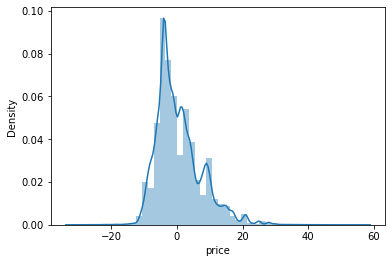

In [116]:
#Seaborn distplot shows a histogram with a line on it.
#comparing predicted value of price to the actual one's.
sns.distplot(yy_test - prediction,bins=50)

#### Decision Tree

In [117]:
#used to predict output values for inputs that are not present in the data set
predictions = decision.predict(xx_test)
prediction

array([ 7, 14, 14, ...,  8, 18, 22])

In [118]:
#datatype of prediction is converted to int
prediction=  prediction.astype(int)

In [119]:
#metrics module implements several loss, score, and utility functions to measure classification performance.
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   5.287667279875915
MSE :   47.97990116509757
RMAE :   6.926752569934743


#### Random Forest

In [120]:
#used to predict output values for inputs that are not present in the data set
predictions = random.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

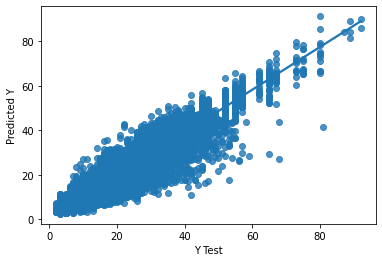

In [121]:
#regplot is used to plot data and a linear regression model fit.
sns.regplot(yy_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [122]:
#metrics module implements several loss, score, and utility functions to measure classification performance.
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(yy_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,predictions)))

MAE :   1.2497827916406996
MSE :   4.286631286469895
RMAE :   2.070418142904929


<AxesSubplot:xlabel='price', ylabel='Density'>

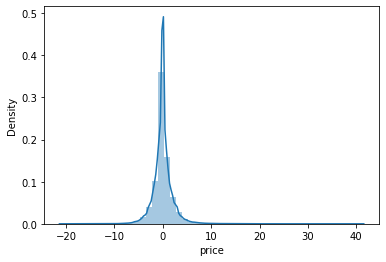

In [123]:
#Seaborn distplot shows a histogram with a line on it.
#comparing predicted value of price to the actual one's.
sns.distplot(yy_test - predictions,bins=50)

#### Price prediction function

In [124]:
#head of new_uber
new_uber.head()

,source,destination,cab_type,product_id,name,surge_multiplier,temperature,precipProbability,icon,uvIndex
0,5,7,0,8,7,1.0,42.34,0.0,5,0
1,5,7,0,12,2,1.0,43.58,1.0,6,0
2,5,7,0,7,5,1.0,38.33,0.0,1,0
3,5,7,0,10,4,1.0,34.38,0.0,1,0
4,5,7,0,11,6,1.0,37.44,0.0,5,0


In [125]:
#defining a function for predicting the price for given attributes using Linear regression model
def linear_predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_uber.columns==name)[0]

    x = np.zeros(len(new_uber.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return linear.predict([x])[0]

In [126]:
pre= linear.predict(xx_test)

In [127]:
#defining a function for predicting the price for given attributes using Decision Tree
def decision_predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_uber.columns==name)[0]

    x = np.zeros(len(new_uber.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return decision.predict([x])[0]

In [128]:
pre= decision.predict(xx_test)

In [129]:
#defining a function for predicting the price for given attributes using Random Forest 
def random_predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_uber.columns==name)[0]

    x = np.zeros(len(new_uber.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return random.predict([x])[0]

In [130]:
pre= random.predict(xx_test)

#  Follow  these instructions before predicting the price: 


#### For cab_name:  
    Black SUV --> 0  
    Lux --> 1  
    Shared --> 2  
    Taxi --> 3  
    UberPool --> 4  
    UberX --> 5


#### For Source:  
    Back Bay --> 0 
    Beacon Hill --> 1 
    Boston University --> 2 
    Fenway --> 3 
    Financial District --> 4 
    Haymarket Square --> 5 
    North End --> 6 
    North Station --> 7 
    Northeastern University --> 8 
    South Station --> 9 
    Theatre District --> 10 
    West End --> 11


#### For Surge_multiplier: 
    Enter Surge Multiplier value from 0 to 4


#### For Icon:  
    clear-day  --> 0 
    clear-night  --> 1 
    cloudy  --> 2 
    fog  --> 3 
    partly-cloudy-day  --> 4 
    partly-cloudy-night  --> 5 
    rain  --> 6


#### predict_price(cab_name , source , surge_multiplier , icon)

In [131]:
linear_predict_price(1 , 3, 2, 0)

-2.650493168872051

In [132]:
random_predict_price(1 , 3, 2, 0)

34.481666666666676

In [133]:
decision_predict_price(1 , 3, 2, 0)

36.0

# Project Outcome:
Accuracy of the price predicted using random forest is more. Because the price for the above mentioned constraints is 35 dollar in the CSV file of the rides dataset. 

# Project Conclusion:

- Using EDA data is analyzed.

- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.

- In this project their are 693071 samples and 57 features which is reduced to 693071 samples and 25 features using RFE.

- Testing multiple algorithms with default hyperparamters gave some understanding for various models performance on this specific dataset.

- Random forest was the best choise as it gives more accutare result compared to other two models.

# ---------------------------------------------------------------------------------------------------------------